# Finding The Transfer Matrix

In [133]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn")
plt.rcParams['figure.dpi'] = 150

## Stating of The Problem
We have two non-trivial potentials, and we are asked to find the the transmission coefficients for both of them. The two reflected potentials are given by

$$
V_±(x) = ± \frac{\hbar ^2 }{2ma^2} \frac{n(n+1)}{\cosh^2{(x/a)}}
$$

## The Strategy
We can use the power of transfer matrix; it's more like a black box. We input the coefficients of the incident wave, then we get the coefficients of the outgoing wave function. But the issue is that we need to break the potential down into smaller pieces.

## The Schrödinger Equation
The Schrödinger equation, then, reduces to

$$
\frac{d^2 \psi}{dx^2} + \left[ k^2 + \frac{n(n+1)}{a^2 \, \cosh^2{(x/a)}} \right] \, \psi = 0
\qquad E = \frac{\hbar^2 k^2}{2m} > 0
$$
We can assume $\hbar = \omega = 1$, and $ka = 1$

## A Glance at The Potentials

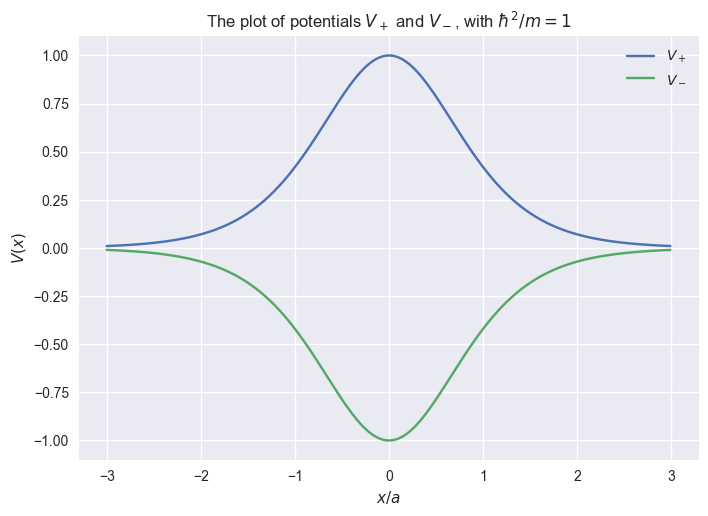

In [64]:
n = 1
a = 1
x = np.arange(-3, 3, 0.01)

def potential(x, a, n, sign):
    return sign * n*(n+1) / (np.cosh(x/a) / a)**2 / 2

plt.plot(x/a, potential(x, a, n, sign=1), label='$V_+$')
plt.plot(x/a, potential(x, a, n, sign=-1), label='$V_-$')
plt.title('The plot of potentials $V_+$ and $V_-$, with $\hbar^2/m = 1$')
plt.legend()
plt.ylabel('$V(x)$')
plt.xlabel('$x/a$')
plt.show()

The case that we are working on here is the scattering state wave function. We are asked to consider an incident energy $E < |V_{max}|$.

## The Scatter Solution $E>0$

Starting from the TISE
$$
- \frac{\hbar^2}{2m} \frac{d^2 \psi}{dx^2} + V\psi = E \psi
$$
We substitute the potential (let's try $V_+$ first)
$$
- \frac{\hbar^2}{2m} \frac{d^2 \psi}{dx^2}
    + \left[ \frac{\hbar ^2 }{2ma^2} \frac{n(n+1)}{\cosh^2{(x/a)}} \right]\psi = E \psi
$$
But we divide the potential $V(x)$ into $n$ constant pieces, as
$$
V \approx V(x_1) + \dots + V(x_i) + \dots + V(x_n)
$$

Then we get
$$
\frac{d^2 \psi}{dx^2} + k^2 \psi = 0 
\qquad k \equiv \frac{\sqrt{2m(E-V_i)}}{\hbar}
$$

Note that $k$ can be real in some regions and not in the others.
The general solution takes the form
$$
\psi (x) = c_1 e^{ikx} + c_2 e^{-ikx}
$$

or by indicating their traveling direction and the $x$ positions
$$
\psi_i(x)= \psi_{+i}(x) + \psi_{-i}(x)
$$
- $\psi_i(x)$ is the wave function with $V=V(x_1)$.
- $\psi_{+i}(x)$ is the wave function traveling to the right.
- $\psi_{-i}(x)$ is the wave function traveling to the left.

### Transfer Matrix

We are willing to find a matrix $M$ that applies to the incident wave function $\psi_1$ to give us the outgoing wave function $\psi_n$, as
$$
\psi_n = M\psi_1
$$

The definition is given as 
$$
M(x_n, x_1) = M_s(k_0, k_n)\, M_0(k_n, L_n)\, M_s(k_n, k_{n-1}) \dots \\
            \dots M_0(k_2, L_2)\, M_s(k_2, k_1)\, M_0(k_1, L_1)\, M_s(k_1, K_0)
$$
where
$$
M_0(k, L) = \begin{bmatrix}
    e^{ikL} & 0 \\
    0       & e^{-ikL}
\end{bmatrix} \qquad
M_s(k_+, k_-) = \frac{1}{2} \begin{bmatrix}
1+\frac{k_-}{k_+} & 1-\frac{k_-}{k_+} \\
1-\frac{k_-}{k_+} & 1+\frac{k_-}{k_+}
\end{bmatrix} \qquad
k_i = \frac{\sqrt{2m(E-V_i)}}{\hbar}
$$

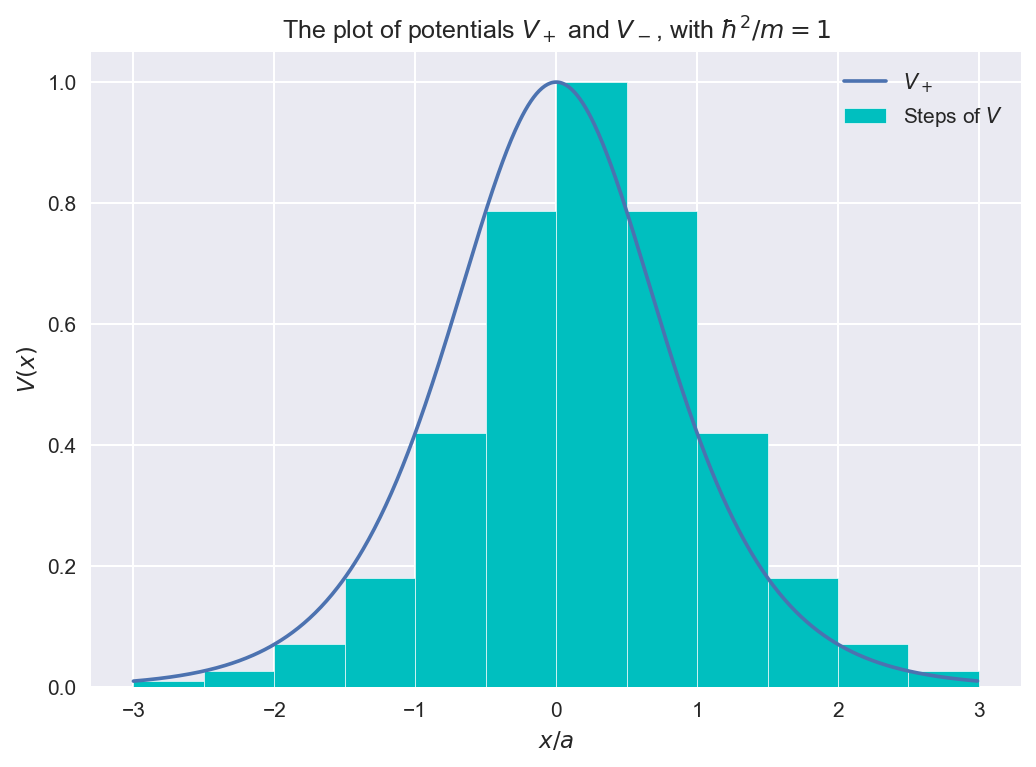

In [134]:
def divide_potential(width, interval, a, sign):
    steps = []
    for x in np.arange(interval[0], interval[1], width):
        steps.append(potential(x, a, 1, sign))
    return steps


width = 0.5
intervals = np.arange(-3, 3, width)
x = np.arange(-3, 3, 0.01)

plt.plot(x / a, potential(x, a, n, sign=1), label="$V_+$",)
plt.bar(
    intervals,
    potential(intervals, a, n, sign=1),
    width=width,
    color="c",
    align='edge',
    edgecolor="w",
    label='$V$ as steps',
)
plt.title("The plot of potentials $V_+$ and $V_-$, with $\hbar^2/m = 1$")
plt.legend()
plt.ylabel("$V(x)$")
plt.xlabel("$x/a$")
plt.show()
